<a href="https://colab.research.google.com/github/aak29/aak29/blob/main/MGS_314_Week12copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import the packages
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [3]:
#Pick a style:
style.use('ggplot')

To see all available styles, use this command:  
print(plt.style.available)

In [6]:
start = dt.datetime(2022,1,1)
end = dt.datetime(2022,12,31)


In [7]:
#Create a dataframe
df = web.DataReader('TSLA', 'stooq', start, end)

In [8]:
#Export to a csv
df.to_csv('tsla.csv')

In [9]:
#Reduce decimal places for easier viewing
pd.set_option("display.precision", 2)

In [10]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-15,195.88,200.82,192.06,194.42,91293785
2022-11-14,192.77,195.73,186.34,190.95,92226649
2022-11-11,186.00,196.52,182.59,195.97,114403575
2022-11-10,189.90,191.00,180.03,190.72,132703015
2022-11-09,190.78,195.89,177.12,177.59,127062659


If we read the csv back in as a dataframe:
df = pd.read_csv('tsla.csv')
pandas will assign it’s own index.

Which is not what we want…
We’ll need to specify the index when we create the dataframe:

In [11]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-14,192.77,195.73,186.34,190.95,92226649
2022-11-11,186.00,196.52,182.59,195.97,114403575
2022-11-10,189.90,191.00,180.03,190.72,132703015
2022-11-09,190.78,195.89,177.12,177.59,127062659
2022-11-08,194.02,195.20,186.75,191.30,128803404
...,...,...,...,...,...
2022-01-07,360.12,360.31,336.67,342.32,84164748
2022-01-06,359.00,362.67,340.17,354.90,90336474
2022-01-05,382.22,390.11,360.34,362.71,80119797


The volume can be 100’s or millions of trades, and the price will most likely be in the thousand or below range.  
The graph will be overwhelmed by those numbers, so we need to select data from the columns.


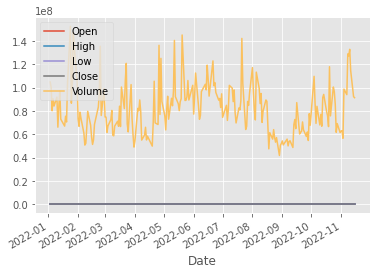

In [14]:
df.plot()

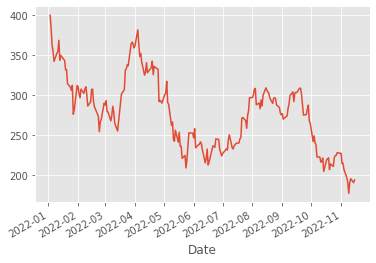

In [15]:
df['Close'].plot()
#plt.show()


## 100 day Moving Average
A moving average is a technique often used in technical analysis that smooths price histories by averaging daily prices over some period of time.
 We have already referenced columns in pandas using square brackets, here's an application to also make new ones.


In [17]:
df['100ma'] = df['Close'].rolling(window=100).mean()

In [18]:
df

,Open,High,Low,Close,Volume,100ma
Date,,,,,,
2022-11-15,195.88,200.82,192.06,194.42,91293785,NaN
2022-11-14,192.77,195.73,186.34,190.95,92226649,NaN
2022-11-11,186.00,196.52,182.59,195.97,114403575,NaN
2022-11-10,189.90,191.00,180.03,190.72,132703015,NaN
2022-11-09,190.78,195.89,177.12,177.59,127062659,NaN
...,...,...,...,...,...,...
2022-01-07,360.12,360.31,336.67,342.32,84164748,300.66
2022-01-06,359.00,362.67,340.17,354.90,90336474,301.74
2022-01-05,382.22,390.11,360.34,362.71,80119797,302.84


If we try to check it by printing the head(), it won’t work, because there aren’t enough days to calculate the average.

However: if we use **df.dropna(inplace=True)**, it allows us to drop the entire row that gives us NaN answers 'inplace' means we don’t have to redefine the  dataframe


In [ ]:
df.dropna(inplace=True)

Unfortunately, that starts our data 100 days into the year.

In [ ]:
df

,Open,High,Low,Close,Volume,100ma
Date,,,,,,
2022-06-24,237.47,246.07,236.09,245.71,95770695,257.59
2022-06-23,237.91,239.32,228.64,235.07,104202678,258.03
2022-06-22,234.50,246.83,233.83,236.09,101527260,258.43
2022-06-21,224.60,243.58,224.33,237.04,122792955,258.89
2022-06-17,213.43,220.97,213.20,216.76,92641770,259.29
...,...,...,...,...,...,...
2022-01-07,360.12,360.31,336.67,342.32,84164748,300.66
2022-01-06,359.00,362.67,340.17,354.90,90336474,301.74
2022-01-05,382.22,390.11,360.34,362.71,80119797,302.84


We can also adjust the dates for calculation with min_periods = 0, but the data will not be reliable for the first 99 days. 
Which will look like:


In [19]:
df['100ma'] = df['Close'].rolling(window=100, min_periods = 0 ).mean()
df

,Open,High,Low,Close,Volume,100ma
Date,,,,,,
2022-11-15,195.88,200.82,192.06,194.42,91293785,194.42
2022-11-14,192.77,195.73,186.34,190.95,92226649,192.69
2022-11-11,186.00,196.52,182.59,195.97,114403575,193.78
2022-11-10,189.90,191.00,180.03,190.72,132703015,193.01
2022-11-09,190.78,195.89,177.12,177.59,127062659,189.93
...,...,...,...,...,...,...
2022-01-07,360.12,360.31,336.67,342.32,84164748,300.66
2022-01-06,359.00,362.67,340.17,354.90,90336474,301.74
2022-01-05,382.22,390.11,360.34,362.71,80119797,302.84


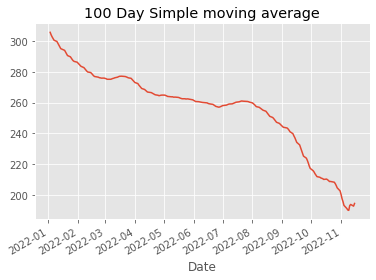

In [21]:
df['100ma'].plot()
plt.title('100 Day Simple moving average');

Let's put the together and see what they look like.

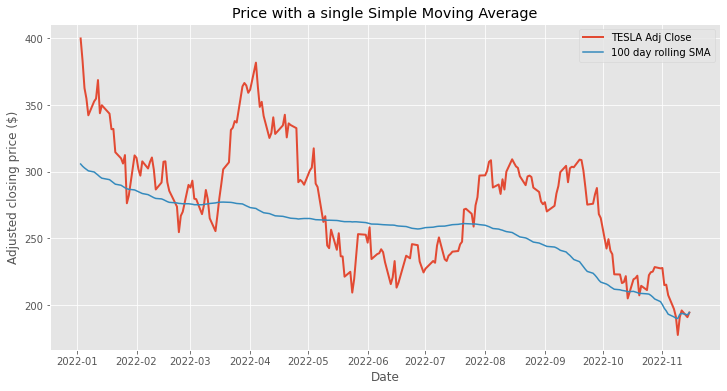

In [25]:
#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting Close and SMA lines:
plt.plot(df['Close'], label='TESLA Adj Close', linewidth = 2)
plt.plot(df['100ma'], label='100 day rolling SMA', linewidth = 1.5)

#Adding title and labels on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend();


Looks pretty good, but we'll need to add the Volume numbers to give it some context.

## Adding another graph
*   We now have a good enough picture of the basics that we can explore the most effective ways to represent data visually.
*   We can contrast with different types of plotting for different categories of data.
*   As the final report requires five years of data, we may need to resample to make the project more manageable.
*   It may even be to our advantage to use different styles from matplotlib.






*   Plotting matplotlib figures create subplots, known as axes:
*   Lets create a grid and name it **ax1** that's 8 rows by 1 column, and  starts at 0,0, spans 5 rows and 1 column

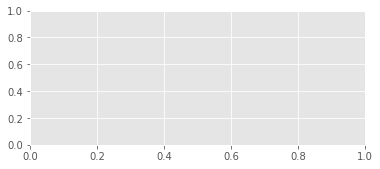

In [31]:
ax1= plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan =1) 


The code below creates another axis named **ax2** that starts at row 6 and only spans 1 row

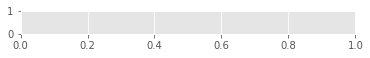

In [32]:
ax2= plt.subplot2grid((8,1), (6,0), rowspan = 1, colspan =1) 

Now we can plot our data by giving matplotlib the x and y coordinates from our dataframe. 

In our case, we want to use the date, which is the index column, as well as the Close column.

ax1.plot(df.index, df['Close'])

And the 100 day moving average to compare the graphs:

ax1.plot(df.index, df['100ma'])

We can also use a second set of data and a different graph type for the volume numbers:

ax2.bar(df.index, df['Volume'])


In [35]:
ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])



<BarContainer object of 220 artists>

In order to synchronize the two graphs we can add a share command to the second plot.

They don’t actually share the same x-axis but if you zoom in on one graph, it stays in synch with the other as well.

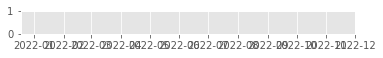

In [36]:
ax2 =plt.subplot2grid((8,1), (5,0), rowspan=1, colspan=1, sharex=ax1)


# Combined Graph
We'll redraw the graph with all the data...

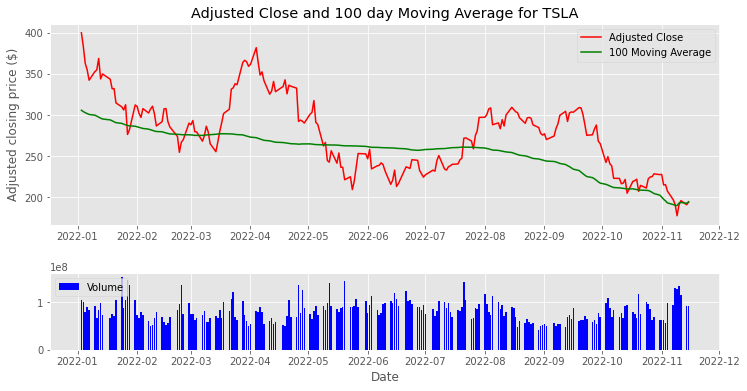

In [29]:
#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting Adj Close and SMA lines:
ax1 = plt.subplot2grid((8,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((8,1),(6,0),rowspan=3,colspan=1, sharex=ax1)

ax1.plot(df.index,df['Close'], 'r',label='Adjusted Close')
ax1.plot(df.index,df['100ma'], 'g', label= "100 Moving Average")
plt.xlabel('Date')
#ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted closing price ($)')
ax1.set_title('Adjusted Close and 100 day Moving Average for TSLA')
ax1.legend()

ax2.bar(df.index,df['Volume'], label = "Volume", color='b')
ax2.legend()

plt.show()


Candlestick Charts

In [37]:
! pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 71 kB 4.0 MB/s 


In [38]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

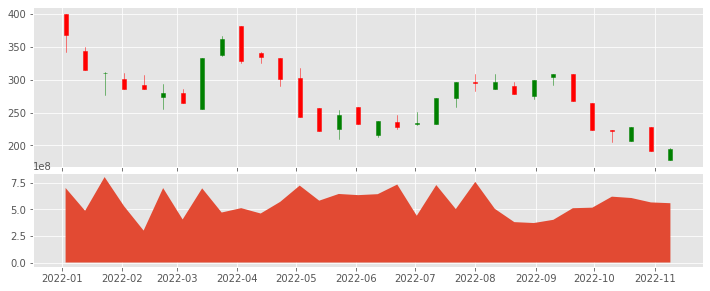

In [39]:
#The size for our chart:
plt.figure(figsize = (12,6))

df_ohlc = df['Close'].resample('10D').ohlc()
df_volume = df['Volume']. resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] =df_ohlc['Date'].map(mdates.date2num)

ax1 =plt.subplot2grid((10,1), (0,0), rowspan=5, colspan=1)
ax2 =plt.subplot2grid((10,1), (5,0), rowspan=3, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()
